# Gradient Descent
In this tutorial we will cover :

1. What is gradient descent?
2. 
3. Implementing gradient descent for linear regression

## What is gradient descent?
Gradient descent is an optimisation method to minimize the loss function. It can be used with any machine learning algorithm, like from linear regression, logistic regression etc.

The main principle behind gradient descent is taking the derivative of the loss function and using it along with the learning parameter to find new coefficients. The algorithm can be denoted in a number of steps:

1. Take the derivative (gradient) of loss function for each parameter in it.
2. Start with any random values for the parameters.
3. Plug the parameter values in the derivative.
4. Calculate the step size as : step size = slope * learning rate.
5. Find the new parameter by using : new parameter = old parameter - step size.

A few terms that might be confusing here are step size, slope and learning rate.
* Slope is the value after plugging in parameter values in gradient/derivative of loss function at any given point.
* Step size is the increment in parameter value after each iteration. It is calculated based on slope and learning rate, as seen above.
* Learning rate is the speed at which gradient descent increases step size. 

There can be two types of gradient descent optimizations:
1. Batch gradient descent - Batch gradient descent refers to calculating the derivative from all training data before calculating an update.
2. Stochastic gradient descent - Stochastic gradient descent (SGD) refers to calculating the derivative from each training data instance and calculating the update immediately.
3. Mini batch gradient descent - Mini-batch gradient descent is the go-to method since it’s a combination of the concepts of SGD and batch gradient descent. It simply splits the training dataset into small batches and performs an update for each of those batches. This creates a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent.

In gradient descent, our step sizes are larger when we are far away from the minimum, and the step sizes keep getting smaller as we reach near the minimum.

## Implementation of gradient descent for linear regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$$ Y = mX + c $$

We will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

### Loss Function
The loss here comes from errors in prediction of m and c. This is what you are aiming to minimize using gradient descent.
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:
1. Find the difference between the actual y and predicted y value(y = mx + c), for a given x.
2. Square this difference.
3. Find the mean of the squares for every value in X.
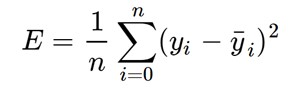
Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ:

### Using gradient descent

1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.
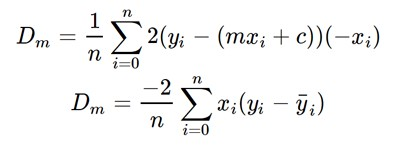
    Dm is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, Dc :
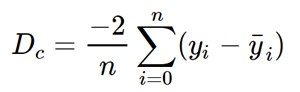
3. Now we update the current value of m and c using the following equation:
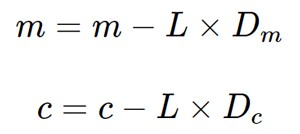
4. We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

From the above set of steps, you can understand L * D as step size, and the new m and c as new parameters obstained by old parameter - step size. Below you can see the implementation of these steps through code.

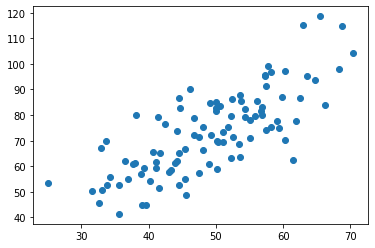

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing Input data
data = pd.read_csv('data.csv') # A dataset containing 100 values of x and corresponding values of y
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

This is the distribution of our data. The goal of gradient descent along with linear regression is to find the line with best fit for this data. 

In [4]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4796491688889395 0.10148121494753726


Thus, you have obtained the value of coefficients m and c. Using this you can now find the linear regression line that fits the data.

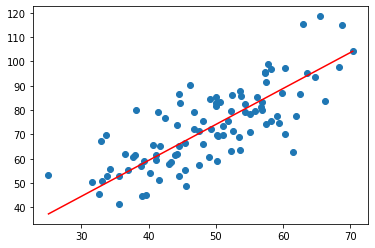

In [5]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

## References
* [Video](https://www.youtube.com/watch?v=sDv4f4s2SB8) by Statquest - Josh Starmer
* Towards Data Science [blog](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)